## 2. 局部加权线性回归

In [1]:
from numpy import *

def loadDataSet(fileName):
    '''导入文件，返回X和y'''
    # 特征维数
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        # strip 去除字符串头尾的 white space char
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

#### 回归系数 $\hat{w}^*=(X^T{}WX)^{-1}X^T{}Wy$ （其中$W$ 是一个对角矩阵，用来给每个数据点赋予权重）

#### 最常用的高斯核 $w(i,i)=\exp(\frac{|x^{(i)}-x|}{-2k^2})$

In [2]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye(m))
    for j in xrange(m):
        # 针对testPoint创建w矩阵
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat * diffMat.T / (-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    # 对每个测试数据调用lwlr
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

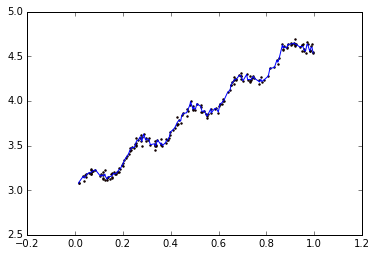

In [3]:
xArr, yArr = loadDataSet("./data/ex0.txt")
yHat = lwlrTest(xArr, xArr, yArr, 0.003)
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)   # shape (200,1)
xSort = xMat[srtInd][:,0,:] # xMat[srtInd] shape (200,1,2)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()